In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Leamos el database y despues con ***`.head(cant)`*** mostramos la cantidad de filas que queremos ver (si no ponemos nada, por defecto muestra las primeras 5).

In [2]:
df = pd.read_csv("./loan_data_modified2.csv")
df.head()  # muestra 5 por defecto

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,home_ownership,grade,outcome,emp_length,emp_len_,borrower_score
0,Charged Off,2500,f,12000,16.30,7.77800,4853,42.2,OWN,6.6,default,0,f,0.40
1,Charged Off,1000,f,18408,6.00,2.24902,2510,83.7,RENT,4.6,default,0,f,0.35
2,Charged Off,1700,f,37800,27.00,1.68889,16333,91.2,MORTGAGE,6.8,default,0,f,0.25
3,Charged Off,8575,f,32000,22.54,11.55790,20142,89.9,MORTGAGE,3.8,default,0,f,0.55
4,Charged Off,14125,f,45696,21.93,12.39500,15831,91.5,MORTGAGE,5.8,default,0,f,0.30


Ahora mostramos las columnas para poder luego seleccionar cual queremos como ***PREDICTORES*** y cual como ***OUTCOME***.

In [3]:
df.columns

Index(['status', 'loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio',
       'revol_bal', 'revol_util', 'home_ownership', 'grade', 'outcome',
       'emp_length', 'emp_len_', 'borrower_score'],
      dtype='object')

Si en el ***OUTCOME*** hay una sola columna entonces se lo guarda como ***string***, si no se lo guarca como ***lista***.

In [4]:
predictor = [ 'loan_amnt', 'annual_inc', 'dti', 'payment_inc_ratio','revol_bal', 'revol_util', 'grade','emp_length', 'borrower_score']
outcome = 'outcome'

Como std se toma que ***X*** son los ***PREDICTORES*** y las ***Y*** son los ***OUTCOME***. Entonces tomamos los datos de los predictores del dataframe y los guardamos en ***X*** y los del outcome y los guardamos en ***Y***.

In [5]:
X = df[predictor]
Y = df[outcome]

Ahora vamos a ***estandarizar*** los datos de los predictores para que esten todos como a una misma escala, y los definimos como ***float***. Los datos a estandarizar tienen que ser ***numericos***.

In [6]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))  # estandarizamos los datos numericos

A partir de ahora lo que hacemos es cambiar la ***f*** y la ***t*** de la columna ***emp_len_*** y ***term*** a ***False*** y ***True*** respectivamente.
Esto se hizo a ***modo didactico***.

In [86]:
aux = df['emp_len_']

In [90]:
aux[aux == 'f'] = False

/tmp/ipykernel_3206/1540016850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux == 'f'] = False


In [92]:
aux[aux == 't'] = True

/tmp/ipykernel_3206/350803457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux == 't'] = True


In [94]:
aux = aux.astype(bool)

In [96]:
df['emp_len_'] = aux

In [99]:
aux = df['term']

In [100]:
aux[aux == 'f'] = False

/tmp/ipykernel_3206/1540016850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux == 'f'] = False


In [101]:
aux[aux == 't'] = True

/tmp/ipykernel_3206/350803457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux == 't'] = True


In [102]:
aux = aux.astype(bool)

In [105]:
df['term'] = aux

In [106]:
df

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,home_ownership,grade,outcome,emp_length,emp_len_,borrower_score
0,Charged Off,2500,False,12000,16.30,7.77800,4853,42.2,OWN,6.6,default,0,False,0.40
1,Charged Off,1000,False,18408,6.00,2.24902,2510,83.7,RENT,4.6,default,0,False,0.35
2,Charged Off,1700,False,37800,27.00,1.68889,16333,91.2,MORTGAGE,6.8,default,0,False,0.25
3,Charged Off,8575,False,32000,22.54,11.55790,20142,89.9,MORTGAGE,3.8,default,0,False,0.55
4,Charged Off,14125,False,45696,21.93,12.39500,15831,91.5,MORTGAGE,5.8,default,0,False,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,Fully Paid,21000,False,86666,24.08,10.58380,24895,61.3,RENT,3.4,paid off,7,True,0.55
45338,Fully Paid,8000,False,72000,18.97,4.57850,9725,58.2,RENT,4.2,paid off,8,True,0.35
45339,Fully Paid,2000,False,25200,13.24,3.20333,4925,40.7,MORTGAGE,4.2,paid off,3,True,0.50
45340,Fully Paid,4375,False,20000,7.95,9.98460,6574,73.0,MORTGAGE,2.4,paid off,1,True,0.55


Ahora mostramos como quedo la ***X*** ya estandarizada y la ***Y***.

In [7]:
X

array([[-1.31728848e+00, -9.99525084e-01,  2.18924314e-02, ...,
         1.35283375e+00, -1.68439656e+00, -7.69364349e-01],
       [-1.50273823e+00, -8.85581596e-01, -1.33429911e+00, ...,
         6.17327864e-04, -1.68439656e+00, -1.15790693e+00],
       [-1.41619501e+00, -5.40763848e-01,  1.43075161e+00, ...,
         1.48805540e+00, -1.68439656e+00, -1.93499208e+00],
       ...,
       [-1.37910506e+00, -7.64810033e-01, -3.81014959e-01, ...,
        -2.69825957e-01, -8.84982278e-01,  7.72080771e-03],
       [-1.08547629e+00, -8.57273538e-01, -1.07754440e+00, ...,
        -1.48682074e+00, -1.41792513e+00,  3.96263386e-01],
       [-6.37306052e-01, -3.59393127e-01,  1.41890139e+00, ...,
         4.06282255e-01, -1.41792513e+00,  1.17334854e+00]])

In [8]:
Y

0         default
1         default
2         default
3         default
4         default
           ...   
45337    paid off
45338    paid off
45339    paid off
45340    paid off
45341    paid off
Name: outcome, Length: 45342, dtype: object

Ahora creamos 4 conjuntos de datos: ***X_train, X_test, y_train e y_test***. Esto lo hacemos con la funcion ***`train_test_split(X,Y,random_state=4,test_size=0.2)`***. ***X*** e ***Y*** son los predictores y outcome que antes definimos. El articulo ***random_state=numero*** es donde definimos una semilla para que la aleatoreidad sea siempre la misma cuando usemos el numero definido. Y el articulo ***test_size=porcentaje*** definimos que porcentaje de todos los datos cargados queremos que sea para ***test*** (en este caso definimos un 20%).

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=4,test_size=0.2)

Ahora vamos a crear el modelo. Primero definimos una ***K***. Luego creamos el modelo ***knn*** con la funcion ***`KNeighborsClassifier(n_neighbors=K)`***. 

Luego entrenamos el modelo con la funcion ***`.fit(X_train,y_train)`***, donde en ella colocamos los grupos de datos de entrenamiento que habiamos creado (***X_train e y_train***).

Luego con la funcion ***`.predict(X_test)`*** , ya con el modelo entrenado, predecimos los valores a obtener utilizando los datos de ***X_test*** antes creados. Y los datos predecidos los guardamos en ***y_hat***.

Por ultimo procedemos a averiguar la precision de los datos predecidos con el metodo ***`metrics.accuracy_score(y_test,y_hat)`***. Donde comparamos los datos de ***y_test*** con los datos predecidos obtenidos guardados en ***y_hat***.

In [10]:
K = 10
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
metrics.accuracy_score(y_test,y_hat)

0.6280736575146102

In [11]:
K = 20
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
metrics.accuracy_score(y_test,y_hat)

0.6372257139706693

In [12]:
K = 90
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
metrics.accuracy_score(y_test,y_hat)

0.6516705259675819

In [13]:
K = 200
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
metrics.accuracy_score(y_test,y_hat)

0.6505678685632375

Para no andar probando de a diferentes ***K***, lo automatizamos utilizando un ***`for`***. Creamos dos array de ceros de tamaño Ks. Uno para guardar la presicion de cada prediccion en ***mean_array***. Y en ***std_array*** guardamos la desviación estándar con respecto al tamaño de la muestra, proporcionando así una medida de la precisión ajustada para el tamaño de la muestra.

***`np.std(y_test == y_hat)`*** aca calculamos la ***desviacion estandar (error)*** de los valores de y_test comparados con los de y_hat.

***`np.sqrt(y_test.shape[0])`*** aca calculamos la ***raiz cuadrada*** del tamaño de la muestra de testeo (***y_test***). Como y_test es un array unidimencional, entonces el atributo ***shape[0]*** toma el primer elemento de la tupla resultante, que representa el número de filas (tamaño) de ***y_test***.

***`std_array[n-1] = np.std(y_test == y_hat) / np.sqrt(y_test.shape[0])`*** Esto normaliza la desviación estándar con respecto al tamaño de la muestra, proporcionando así una medida de la precisión ajustada para el tamaño de la muestra.

In [11]:
Ks = 60
mean_array = np.zeros((Ks))
std_array = np.zeros((Ks))
for n in range(1,Ks+1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    mean_array[n-1] = metrics.accuracy_score(y_test,y_hat)
    std_array[n-1] = np.std(y_test == y_hat) / np.sqrt(y_test.shape[0])


Ahora procedemos a graficar la precision del modelo knn en funcion de los  K realizados en el for anterior. El grafico lo realizamos con la funcion ***`plt.plot(eje x, eje y, color de linea)`***. En este caso el eje x sera representado por los valores de K con los cuales entrenamos el modelo que estan representados por ***range(1, Ks+1)***. Y en el eje y ira la precision obtenida correspondiente a cada K, que sera representada por el array obtenido en el for ***mean_array***.

Luego usaremos la funcion ***`plt.fill_between(eje x, eje y1, eje y2, alpha=opacidad, color=de relleno)`*** para rellenar un area entre dos curvas. Estas dos curvas estan representadas por la suma y la resta de la desviacion estandar (***std_array***) a la precision de las predicciones (***mean_array***), mostrando asi la posible variacion de las predicciones del modelo entrenado. 
El 1 es un multiplicador que varia la amplitud del area. Se suele usar 1 y 3. En este caso solo usamos 1.

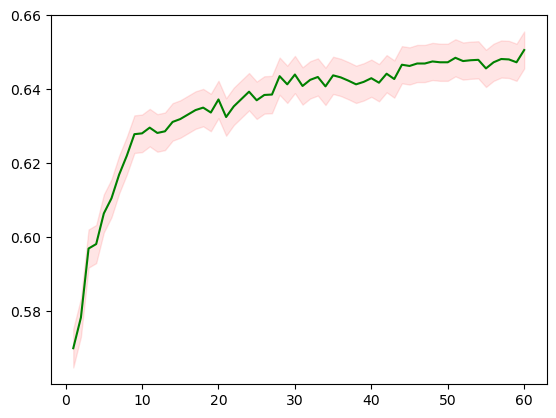

In [12]:
plt.plot(range(1,Ks+1),mean_array,'green')
plt.fill_between(range(1,Ks+1), mean_array - 1 * std_array,mean_array + 1 * std_array, alpha = 0.1, color = 'red')
plt.show()

Ahora para saber cual es el valor mas alto de precision obtenido, utilizamos la funcion ***`.max()`***.

In [13]:
mean_array.max()

0.6505678685632375

Y con la funcion ***`.argmax()`*** obtenemos la posicion del valor mas alto del array. Y esta posicion corresponde al K utilizado para obtener dicho valor.

In [14]:
mean_array.argmax()

59

Aca mostramos la precision obtenida para un valor de ***K=20***.

In [15]:
mean_array[21]

0.6353511963832837

Ahora como ya definimos nuestro K a utilizar (***K=59***) entrenamos nuevamente el modelo con el K correspondiente. Y guardando las predicciones en ***y_hat***.

In [16]:
knn = KNeighborsClassifier(n_neighbors=59)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)

Una vez que tenemos entrenado nuestro modelo con el K correspondiente, procedemos a usar el metodo ***`.predict_proba(X)`*** que nos mostrara la probabilidad, de que los datos ingresados de los predictores (***X***), sea ***paid off*** o ***default***. 

In [17]:
y_hat_prob = knn.predict_proba(X)

In [18]:
y_hat_prob

array([[0.54237288, 0.45762712],
       [0.52542373, 0.47457627],
       [0.55932203, 0.44067797],
       ...,
       [0.49152542, 0.50847458],
       [0.52542373, 0.47457627],
       [0.49152542, 0.50847458]])

In [20]:
y_hat_prob[:,1]

array([0.45762712, 0.47457627, 0.44067797, ..., 0.50847458, 0.47457627,
       0.50847458])

In [23]:
df['borrower_score2'] = y_hat_prob[:,1]

In [26]:
df[['borrower_score','borrower_score2']].mean()

borrower_score     0.499006
borrower_score2    0.510491
dtype: float64

In [27]:
X

array([[-1.31728848e+00, -9.99525084e-01,  2.18924314e-02, ...,
         1.35283375e+00, -1.68439656e+00, -7.69364349e-01],
       [-1.50273823e+00, -8.85581596e-01, -1.33429911e+00, ...,
         6.17327864e-04, -1.68439656e+00, -1.15790693e+00],
       [-1.41619501e+00, -5.40763848e-01,  1.43075161e+00, ...,
         1.48805540e+00, -1.68439656e+00, -1.93499208e+00],
       ...,
       [-1.37910506e+00, -7.64810033e-01, -3.81014959e-01, ...,
        -2.69825957e-01, -8.84982278e-01,  7.72080771e-03],
       [-1.08547629e+00, -8.57273538e-01, -1.07754440e+00, ...,
        -1.48682074e+00, -1.41792513e+00,  3.96263386e-01],
       [-6.37306052e-01, -3.59393127e-01,  1.41890139e+00, ...,
         4.06282255e-01, -1.41792513e+00,  1.17334854e+00]])

In [28]:
y_hat = knn.predict(X)
metrics.accuracy_score(Y,y_hat)

0.6615720524017468

In [29]:
df

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,home_ownership,grade,outcome,emp_length,emp_len_,borrower_score,borrower_score2
0,Charged Off,2500,f,12000,16.30,7.77800,4853,42.2,OWN,6.6,default,0,f,0.40,0.457627
1,Charged Off,1000,f,18408,6.00,2.24902,2510,83.7,RENT,4.6,default,0,f,0.35,0.474576
2,Charged Off,1700,f,37800,27.00,1.68889,16333,91.2,MORTGAGE,6.8,default,0,f,0.25,0.440678
3,Charged Off,8575,f,32000,22.54,11.55790,20142,89.9,MORTGAGE,3.8,default,0,f,0.55,0.372881
4,Charged Off,14125,f,45696,21.93,12.39500,15831,91.5,MORTGAGE,5.8,default,0,f,0.30,0.322034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,Fully Paid,21000,f,86666,24.08,10.58380,24895,61.3,RENT,3.4,paid off,7,t,0.55,0.457627
45338,Fully Paid,8000,f,72000,18.97,4.57850,9725,58.2,RENT,4.2,paid off,8,t,0.35,0.288136
45339,Fully Paid,2000,f,25200,13.24,3.20333,4925,40.7,MORTGAGE,4.2,paid off,3,t,0.50,0.508475
45340,Fully Paid,4375,f,20000,7.95,9.98460,6574,73.0,MORTGAGE,2.4,paid off,1,t,0.55,0.474576


In [30]:
df.iloc[0,:]

status               Charged Off
loan_amnt                   2500
term                           f
annual_inc                 12000
dti                         16.3
payment_inc_ratio          7.778
revol_bal                   4853
revol_util                  42.2
home_ownership               OWN
grade                        6.6
outcome                  default
emp_length                     0
emp_len_                       f
borrower_score               0.4
borrower_score2         0.457627
Name: 0, dtype: object